In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
def poisson_pmf(lambd, k):
    """calculating probability of k events in a Poisson distribution given a rate lambd."""
    return (lambd ** k) * math.exp(-lambd) / math.factorial(k)
def poisson_cdf(lambd, k):
    """Calculate the cumulative probability of <= k events in a Poisson distribution given a rate lambd."""
    cumulative_prob = sum(poisson_pmf(lambd, i) for i in range(k + 1))
    return cumulative_prob

In [4]:
lambda_value = 3
max_k = 10  
print("Poisson PMF and CDF for λ =", lambda_value)
for k in range(max_k + 1):
    pmf = poisson_pmf(lambda_value, k)
    cdf = poisson_cdf(lambda_value, k)
    print(f"k = {k}: PMF = {pmf:.4f}, CDF = {cdf:.4f}")

Poisson PMF and CDF for λ = 3
k = 0: PMF = 0.0498, CDF = 0.0498
k = 1: PMF = 0.1494, CDF = 0.1991
k = 2: PMF = 0.2240, CDF = 0.4232
k = 3: PMF = 0.2240, CDF = 0.6472
k = 4: PMF = 0.1680, CDF = 0.8153
k = 5: PMF = 0.1008, CDF = 0.9161
k = 6: PMF = 0.0504, CDF = 0.9665
k = 7: PMF = 0.0216, CDF = 0.9881
k = 8: PMF = 0.0081, CDF = 0.9962
k = 9: PMF = 0.0027, CDF = 0.9989
k = 10: PMF = 0.0008, CDF = 0.9997


#### Mathematical Computation Check
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

For \( \lambda = 3 \), we calculate the probabilities for \( k \) ranging from 0 to 10.

### Poisson PMF and CDF Calculations:
**\( k = 0 \)**:
$$ P(X = 0) = \frac{3^0 e^{-3}}{0!} = e^{-3} \approx 0.0498 $$
$$ P(X \leq 0) = 0.0498 $$

**\( k = 1 \)**:
$$ P(X = 1) = \frac{3^1 e^{-3}}{1!} = 3e^{-3} \approx 0.1494 $$
$$ P(X \leq 1) = 0.0498 + 0.1494 = 0.1991 $$

**\( k = 2 \)**:
$$ P(X = 2) = \frac{3^2 e^{-3}}{2!} = \frac{9e^{-3}}{2} \approx 0.2240 $$
$$ P(X \leq 2) = 0.4232 $$

**\( k = 3 \)**:
$$ P(X = 3) = \frac{3^3 e^{-3}}{3!} = \frac{27e^{-3}}{6} \approx 0.2240 $$
$$ P(X \leq 3) = 0.6472 $$

**\( k = 4 \)**:
$$ P(X = 4) = \frac{3^4 e^{-3}}{4!} = \frac{81e^{-3}}{24} \approx 0.1680 $$
$$ P(X \leq 4) = 0.8153 $$

**\( k = 5 \)**:
$$ P(X = 5) = \frac{3^5 e^{-3}}{5!} = \frac{243e^{-3}}{120} \approx 0.1008 $$
$$ P(X \leq 5) = 0.9161 $$

**\( k = 6 \)**:
$$ P(X = 6) = \frac{3^6 e^{-3}}{6!} = \frac{729e^{-3}}{720} \approx 0.0504 $$
$$ P(X \leq 6) = 0.9665 $$

**\( k = 7 \)**:
$$ P(X = 7) = \frac{3^7 e^{-3}}{7!} = \frac{2187e^{-3}}{5040} \approx 0.0216 $$
$$ P(X \leq 7) = 0.9881 $$

**\( k = 8 \)**:
$$ P(X = 8) = \frac{3^8 e^{-3}}{8!} = \frac{6561e^{-3}}{40320} \approx 0.0081 $$
$$ P(X \leq 8) = 0.9962 $$

**\( k = 9 \)**:
$$ P(X = 9) = \frac{3^9 e^{-3}}{9!} = \frac{19683e^{-3}}{362880} \approx 0.0027 $$
$$ P(X \leq 9) = 0.9989 $$

**\( k = 10 \)**:
$$ P(X = 10) = \frac{3^{10} e^{-3}}{10!} = \frac{59049e^{-3}}{3628800} \approx 0.0008 $$
$$ P(X \leq 10) = 0.9997 $$

In [16]:
def compound_poisson(lambd, size_rate, n_simulations):
    n_events = np.random.poisson(lambd, n_simulations)
    totals = [np.sum(np.random.exponential(1/size_rate, size=int(events))) for events in n_events]
    return np.array(totals)


import numpy as np

def poisson_gamma(lambd, alpha, beta, n_simulations):
    """
    Generate samples from a Poisson-Gamma (Negative Binomial) distribution.
    This is used to model overdispersed count data.
    
    Parameters:
        lambd (float): Mean of the underlying Poisson distributions.
        alpha (float): Shape parameter of the Gamma distribution.
        beta (float): Rate parameter of the Gamma distribution.
        n_simulations (int): Number of samples to generate.
        
    Returns:
        np.array: Array of simulated counts from the Poisson-Gamma distribution.
    """
    rates = np.random.gamma(alpha, beta, n_simulations)
    return np.random.poisson(lambd * rates)

def zero_inflated_poisson(lambd, p_zero, n_simulations):
    """
    Generate samples from a Zero-Inflated Poisson distribution.
    This model accounts for an excess of zeros by mixing a Poisson distribution with a point mass at zero.
    
    Parameters:
        lambd (float): Mean of the Poisson distribution for non-zero counts.
        p_zero (float): Probability of zero-inflation (i.e., the probability of getting an exact zero).
        n_simulations (int): Number of samples to generate.
        
    Returns:
        np.array: Array of simulated counts from the Zero-Inflated Poisson distribution.
    """
    zeros = np.random.binomial(1, p_zero, n_simulations)
    poisson = np.random.poisson(lambd, n_simulations)
    return np.where(zeros == 1, 0, poisson)

def run_compound_poisson():
    rate_lambda = 5  
    size_rate = 1  
    n_simulations = 1000  
    compound_data = compound_poisson(rate_lambda, size_rate, n_simulations)
    print("Example simulated data:", compound_data[:10])
    
    mean_simulated = np.mean(compound_data)
    variance_simulated = np.var(compound_data)
    
    print("Theoretical Mean:", rate_lambda * size_rate)
    print("Simulated Mean:", mean_simulated)
    print("Theoretical Variance:", rate_lambda * size_rate**2)
    print("Simulated Variance:", variance_simulated)

    return compound_data  

def run_poisson_gamma():
    rate_lambda = 5
    alpha = 2
    beta = 1
    n_simulations = 1000
    pg_data = poisson_gamma(rate_lambda, alpha, beta, n_simulations)
    print("Poisson-Gamma simulated data:", pg_data[:10])

    theoretical_mean = rate_lambda * alpha / beta
    simulated_mean = np.mean(pg_data)
    theoretical_variance = rate_lambda * alpha / beta**2
    simulated_variance = np.var(pg_data)

    print("Theoretical Mean:", theoretical_mean)
    print("Simulated Mean:", simulated_mean)
    print("Theoretical Variance:", theoretical_variance)
    print("Simulated Variance:", simulated_variance)

    return pg_data

def run_zero_inflated_poisson():
    rate_lambda = 3
    p_zero = 0.2
    n_simulations = 1000
    zip_data = zero_inflated_poisson(rate_lambda, p_zero, n_simulations)
    print("Zero-Inflated Poisson simulated data:", zip_data[:10])

    theoretical_mean = rate_lambda * (1 - p_zero)
    simulated_mean = np.mean(zip_data)
    theoretical_variance = rate_lambda * (1 - p_zero) + rate_lambda**2 * p_zero * (1 - p_zero)
    simulated_variance = np.var(zip_data)

    print("Theoretical Mean:", theoretical_mean)
    print("Simulated Mean:", simulated_mean)
    print("Theoretical Variance:", theoretical_variance)
    print("Simulated Variance:", simulated_variance)

    return zip_data

compound_data = run_compound_poisson()
pg_data = run_poisson_gamma()
zip_data = run_zero_inflated_poisson()

Example simulated data: [4.41849301 2.86896299 1.90946257 1.36597511 3.56839709 2.67346363
 0.94212125 0.44372325 2.96167754 3.98487271]
Theoretical Mean: 5
Simulated Mean: 5.0936282617757955
Theoretical Variance: 5
Simulated Variance: 9.425227116683512
Poisson-Gamma simulated data: [ 5 19 22  9  1  4 11  1 10 22]
Theoretical Mean: 10.0
Simulated Mean: 9.811
Theoretical Variance: 10.0
Simulated Variance: 55.001279000000004
Zero-Inflated Poisson simulated data: [2 3 0 0 3 3 3 0 3 6]
Theoretical Mean: 2.4000000000000004
Simulated Mean: 2.39
Theoretical Variance: 3.8400000000000007
Simulated Variance: 3.9659000000000004


/var/folders/bm/dh8z1y295zx4278nbfwzcvz40000gn/T/ipykernel_35484/3379629035.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k_values, pmf_data, 'orange', markerfmt='o', basefmt=" ", use_line_collection=True, label='Poisson PMF')


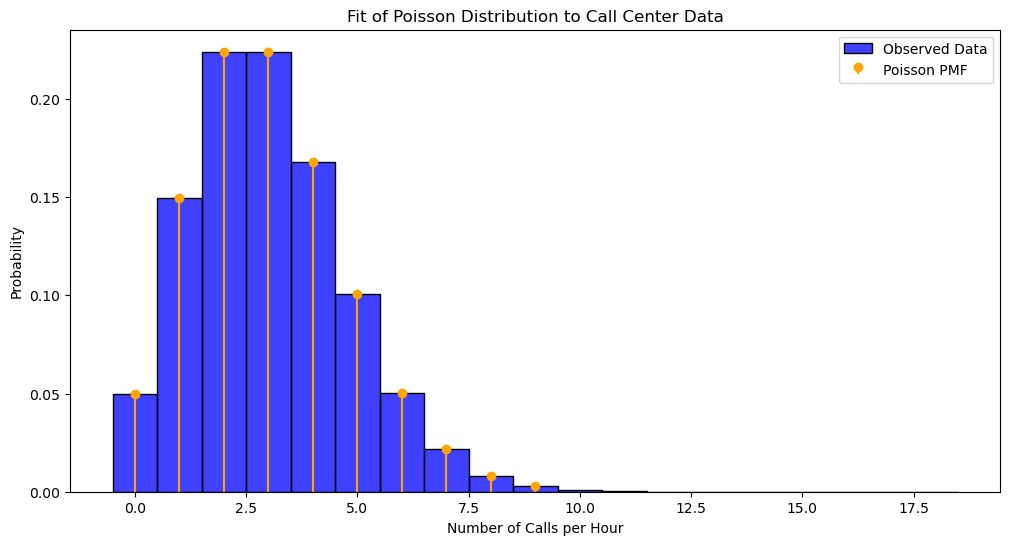

Time taken to generate 100 million Poisson samples: 7.475849151611328 seconds


In [24]:
np.random.seed(42) 
data = np.random.poisson(lam=3, size=100000000)  
lambda_est = np.mean(data)
k_values = np.arange(0, 10)  
pmf_data = [((lambda_est ** k) * np.exp(-lambda_est)) / np.math.factorial(k) for k in k_values]

plt.figure(figsize=(12, 6))
sns.histplot(data, bins=k_values, stat="probability", discrete=True, color='blue', label='Observed Data')
plt.stem(k_values, pmf_data, 'orange', markerfmt='o', basefmt=" ", use_line_collection=True, label='Poisson PMF')
plt.title('Fit of Poisson Distribution to Call Center Data')
plt.xlabel('Number of Calls per Hour')
plt.ylabel('Probability')
plt.legend()
plt.show()

# time taken to perform the poisson 100 million times
start_time = time.time()
data = np.random.poisson(lam=3, size=100000000)
end_time = time.time()
print("Time taken to generate 100 million Poisson samples:", end_time - start_time, "seconds")